In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs

In [3]:
X, _ = make_blobs(n_samples=300, centers=[[1,1],[5,5],[9,1]], cluster_std=0.5, random_state=42)
anomalies = np.array([[10, 10], [0, 0], [8, 8]])  # anomalies (outliers)
X = np.vstack([X, anomalies])

In [4]:
dbscan = DBSCAN(eps=0.5, min_samples=10) #eps signifies radius and min_samples signifies data-points to be considered into a particular cluster
labels = dbscan.fit_predict(X)

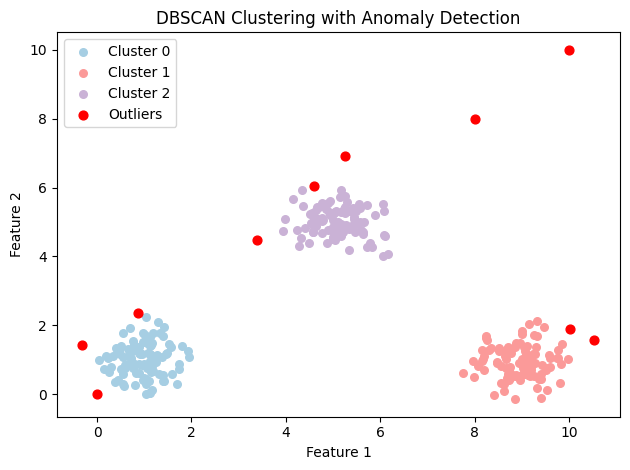

In [5]:
# Plot results
unique_labels = set(labels)
colors = [plt.cm.Paired(each) for each in np.linspace(0, 1, len(unique_labels))]
for label, color in zip(unique_labels, colors):
    if label == -1:
        # Outliers
        plt.scatter(X[labels == label, 0], X[labels == label, 1], c='red', s=40, label='Outliers')
    else:
        plt.scatter(X[labels == label, 0], X[labels == label, 1], c=[color], s=30, label=f'Cluster {label}')
plt.title('DBSCAN Clustering with Anomaly Detection')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='best')
plt.tight_layout()
plt.show()